In [228]:
import bs4 as bs
import urllib.request
import re
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [685]:
from tqdm import tqdm
from crawler import *
from preprocessor import *
from model import Model,word2vecEstimator, doc2vecEstimator
from dataPreparer import initPrepare, splitDataSets

In [532]:
uids, COURSENAMES, COURSEDESCRIPTIONS, TRUTHTABLE = initPrepare()

Begin parsing the websites
Begin building necessary data structures


In [515]:
trainSets, testSets = splitDataSets(uids)

In [559]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [545]:
model = Model(algo="glove")

Loading model can take long time.


In [563]:
model.predict(trainSets[:10])

'crnc' is not in glove model. It is ignored.
'chloramination' is not in glove model. It is ignored.
'ipcrnc' is not in glove model. It is ignored.
'astrodynamics' is not in glove model. It is ignored.
'hashtables' is not in glove model. It is ignored.
'languageprerequisite' is not in glove model. It is ignored.
'csci' is not in glove model. It is ignored.
'corequisite' is not in glove model. It is ignored.
'csci' is not in glove model. It is ignored.
'masterâ€™s' is not in glove model. It is ignored.


[-1.4149051,
 0.41061586,
 -0.857143,
 1.1189594,
 -1.7749768,
 -0.1682522,
 0.53245926,
 0.6009726,
 1.4142448,
 0.13802746]

In [722]:
model2 = Model(algo="doc2vec")

In [718]:
model3 = word2vecEstimator(TRUTHTABLE)

In [582]:
uids, desc1, desc2, name1, name2 = model2.augmentData(trainSets)
sentences1 = [preprocessor.process(desc) for desc in desc1]
sentences2 = [preprocessor.process(desc) for desc in desc2]

In [719]:
model3.fit(uids[:100],[(sentences1[i], sentences2[i])
                               for i in range(100)])

In [720]:
res = model3.predict(uids[:100],[(sentences1[i], sentences2[i])
                               for i in range(100)])

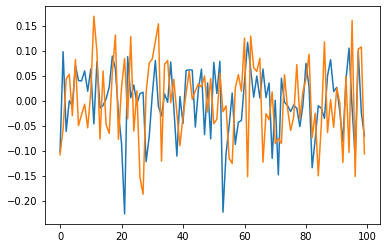

In [721]:
plt.plot(np.array([TRUTHTABLE[uid] for uid in uids[:100]]))

plt.plot(res)

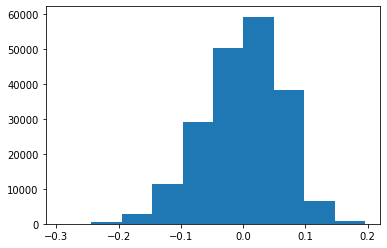

In [709]:
_ = plt.hist(list(TRUTHTABLE.values()))

In [707]:
np.min(list(TRUTHTABLE.values()))

-0.2928579

In [708]:
np.max(list(TRUTHTABLE.values()))

0.19589609

In [729]:
model2 = Model(algo="doc2vec")
model2.trainCV(uids[:200])

CV results: {'mean_fit_time': array([0.24008807, 0.23810299, 0.23121381, 0.24247225, 0.23841031,
       0.23927585, 0.30972608, 0.30229894, 0.32600474, 0.3505346 ,
       0.3137157 , 0.32081079, 0.25875123, 0.24348235, 0.24522273,
       0.24559506, 0.22329513, 0.22852961, 0.30593499, 0.30831194,
       0.29516435, 0.29801702, 0.29599396, 0.29483056]), 'std_fit_time': array([0.0054529 , 0.00868675, 0.00286883, 0.00603618, 0.00200172,
       0.0017861 , 0.00786403, 0.01020309, 0.02466323, 0.00589925,
       0.00771694, 0.00967111, 0.0007588 , 0.00406927, 0.00702377,
       0.00842099, 0.00231047, 0.00427944, 0.00576426, 0.00666379,
       0.00230051, 0.00324507, 0.00422219, 0.00055596]), 'mean_score_time': array([0.05171227, 0.04519908, 0.04341094, 0.04644005, 0.04659804,
       0.04489875, 0.08084194, 0.06463059, 0.06541491, 0.06990671,
       0.07312926, 0.07220197, 0.04931402, 0.04768991, 0.04712725,
       0.04394857, 0.04279359, 0.04307564, 0.06390691, 0.07068356,
       0.06483634

In [730]:
model2.bestParam

{'alpha': 0.025, 'dm': 1, 'vector_size': 50, 'window': 5}

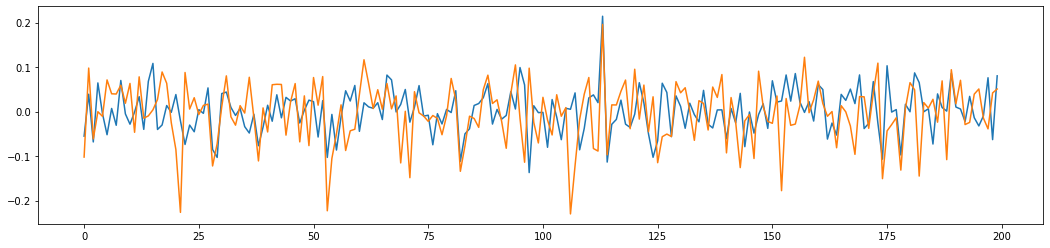

In [732]:
plt.figure(figsize=(18,4))
plt.plot(model2.predict(uids[:200]))
plt.plot(np.array([TRUTHTABLE[uid] for uid in uids[:200]]))

In [676]:
from gensim.models.doc2vec import Doc2Vec

In [677]:
from gensim.test.utils import common_texts

In [739]:
from dataPreparer import splitDataSets, generateUIDs

In [736]:
cids, uids, COURSENAMES, COURSEDESCRIPTIONS, TRUTHTABLE = initPrepare()

Begin parsing the websites
Begin building necessary data structures


In [738]:
trainCIDs, testCIDS = splitDataSets(cids)

In [746]:
trainUIDs = generateUIDs(trainCIDs)
testUIDs = generateUIDs(testCIDS)

In [916]:
from crawler import uclaParse

In [918]:
uclaParse()

In [915]:
uclaCourses

{'COMSCI0': {"cid": "COMSCI0", "course name": "1. Freshman Computer Science Seminar", "course url": null, "course prereq": [], "course coreqs": []},
 'COMSCI1': {"cid": "COMSCI1", "course name": "19. Fiat Lux Freshman Seminars", "course url": null, "course prereq": [], "course coreqs": []},
 'COMSCI2': {"cid": "COMSCI2", "course name": "30. Principles and Practices of Computing", "course url": null, "course prereq": [], "course coreqs": []},
 'COMSCI3': {"cid": "COMSCI3", "course name": "31. Introduction to Computer Science I", "course url": null, "course prereq": [], "course coreqs": []},
 'COMSCI4': {"cid": "COMSCI4", "course name": "32. Introduction to Computer Science II", "course url": null, "course prereq": [], "course coreqs": []},
 'COMSCI5': {"cid": "COMSCI5", "course name": "33. Introduction to Computer Organization", "course url": null, "course prereq": [], "course coreqs": []},
 'COMSCI6': {"cid": "COMSCI6", "course name": "35L. Software Construction Laboratory", "course ur

In [758]:
from api import API

In [919]:
from api import uclaDataSaver

In [922]:
import pickle

In [924]:
uclaDataSaver()

bolster is not in trained word2vec model, skipped.
letter is not in trained word2vec model, skipped.
importance is not in trained word2vec model, skipped.
illuminating is not in trained word2vec model, skipped.
ucla is not in trained word2vec model, skipped.
pnp is not in trained word2vec model, skipped.
designed is not in trained word2vec model, skipped.
precursor is not in trained word2vec model, skipped.
creativity is not in trained word2vec model, skipped.
integer is not in trained word2vec model, skipped.
string is not in trained word2vec model, skipped.
decomposition is not in trained word2vec model, skipped.
letter is not in trained word2vec model, skipped.
operator is not in trained word2vec model, skipped.
inputoutput is not in glove model, skipped.
string is not in trained word2vec model, skipped.
letter is not in trained word2vec model, skipped.
enforced is not in trained word2vec model, skipped.
inheritance is not in trained word2vec model, skipped.
polymorphism is not in t

enforced is not in trained word2vec model, skipped.
photography is not in trained word2vec model, skipped.
camera is not in trained word2vec model, skipped.
capture is not in trained word2vec model, skipped.
shape is not in trained word2vec model, skipped.
appearance is not in trained word2vec model, skipped.
acquire is not in trained word2vec model, skipped.
unparalleled is not in trained word2vec model, skipped.
entertainment is not in trained word2vec model, skipped.
reverse is not in trained word2vec model, skipped.
postprocessing is not in trained word2vec model, skipped.
movie is not in trained word2vec model, skipped.
realistic is not in trained word2vec model, skipped.
synthetic is not in trained word2vec model, skipped.
surveillance is not in trained word2vec model, skipped.
inferring is not in trained word2vec model, skipped.
shape is not in trained word2vec model, skipped.
photometric is not in trained word2vec model, skipped.
reflectance is not in trained word2vec model, sk

queueing is not in glove model, skipped.
waiting is not in trained word2vec model, skipped.
markov is not in glove model, skipped.
baby is not in trained word2vec model, skipped.
queueing is not in glove model, skipped.
mer is not in trained word2vec model, skipped.
erm is not in trained word2vec model, skipped.
bulk is not in trained word2vec model, skipped.
arrival is not in trained word2vec model, skipped.
bulk is not in trained word2vec model, skipped.
queueing is not in glove model, skipped.
queueing is not in glove model, skipped.
mg is not in trained word2vec model, skipped.
gmm is not in trained word2vec model, skipped.
collective is not in trained word2vec model, skipped.
mark is not in trained word2vec model, skipped.
queueing is not in glove model, skipped.
gg is not in trained word2vec model, skipped.
lindley is not in trained word2vec model, skipped.
lindley is not in glove model, skipped.
inequality is not in trained word2vec model, skipped.
letter is not in trained word2

logical is not in trained word2vec model, skipped.
rule is not in trained word2vec model, skipped.
nonmonotonic is not in trained word2vec model, skipped.
nonmonotonic is not in glove model, skipped.
temporal is not in trained word2vec model, skipped.
deductive is not in trained word2vec model, skipped.
ordbs is not in trained word2vec model, skipped.
ordbs is not in glove model, skipped.
ordbs is not in trained word2vec model, skipped.
ordbs is not in glove model, skipped.
semistructured is not in trained word2vec model, skipped.
letter is not in trained word2vec model, skipped.
half is not in trained word2vec model, skipped.
minute is not in trained word2vec model, skipped.
seven is not in trained word2vec model, skipped.
alphanumeric is not in trained word2vec model, skipped.
text is not in trained word2vec model, skipped.
imagespictures is not in trained word2vec model, skipped.
imagespictures is not in glove model, skipped.
accessing is not in trained word2vec model, skipped.
alph

logical is not in trained word2vec model, skipped.
satisfiability is not in trained word2vec model, skipped.
satisfiability is not in glove model, skipped.
entailment is not in trained word2vec model, skipped.
entailment is not in glove model, skipped.
syntactic is not in trained word2vec model, skipped.
restriction is not in trained word2vec model, skipped.
restriction is not in trained word2vec model, skipped.
expressiveness is not in trained word2vec model, skipped.
compactness is not in trained word2vec model, skipped.
tractability is not in trained word2vec model, skipped.
letter is not in trained word2vec model, skipped.
analogy is not in trained word2vec model, skipped.
inductive is not in trained word2vec model, skipped.
creativity is not in trained word2vec model, skipped.
episodic is not in trained word2vec model, skipped.
bacon is not in trained word2vec model, skipped.
eurisko is not in trained word2vec model, skipped.
eurisko is not in glove model, skipped.
teachable is no

doe is not in trained word2vec model, skipped.
equal is not in trained word2vec model, skipped.
average is not in trained word2vec model, skipped.
hardness is not in trained word2vec model, skipped.
letter is not in trained word2vec model, skipped.
developed is not in trained word2vec model, skipped.
letter is not in trained word2vec model, skipped.
arising is not in trained word2vec model, skipped.
navigating is not in trained word2vec model, skipped.
unknown is not in trained word2vec model, skipped.
terrain is not in trained word2vec model, skipped.
letter is not in trained word2vec model, skipped.
developed is not in trained word2vec model, skipped.
letter is not in trained word2vec model, skipped.
markov is not in glove model, skipped.
walk is not in trained word2vec model, skipped.
letter is not in trained word2vec model, skipped.
developed is not in trained word2vec model, skipped.
letter is not in trained word2vec model, skipped.
mc is not in trained word2vec model, skipped.
mu

In [938]:
api1 = API(model_algo = "word2vec")

In [939]:
api1.queryUCLACID("CSCI457")

('COMSCI94', '251A. Advanced Computer Architecture')

In [940]:
api1.queryUCLACID("CSCI585")

('COMSCI25', '143. Database Systems')

In [941]:
api1.queryUCLACID("CSCI402")

('COMSCI10', '111. Operating Systems Principles')

In [946]:
api1.queryUCLACID("CSCI570")

('COMSCI123', '280AP. Algorithms: Approximation Algorithms')

In [895]:
api1.queryPrereqsCIDs(["CSCI557","CSCI457","SCRM580"])

CSCI557 has prerequisites:  ['EE457']
CSCI457 has prerequisites:  ['EE354']
SCRM580 has no prerequsites.


[1, 0, 0]

In [896]:
api1.querySameSchoolCIDs(["CSCI557"])

Top10 related courses of CSCI557:  ['CSCI557', 'EE557', 'EE457', 'CSCI526', 'CSCI457', 'SAE542', 'AME105', 'ISE220', 'ISE511', 'CSCI455']


[1.0]

In [873]:
api1.stringQuery("medicine biology")

[('SCRM590', 0.7166064446435668),
 ('PHBI550', 0.6992358335211644),
 ('MEDS530A', 0.6866820522332564),
 ('PCPA530', 0.6860332520177175),
 ('PCPA549', 0.6788092766461861),
 ('PCPA543', 0.6715963229591514),
 ('TRGN536', 0.6619825033065139),
 ('MEDS315', 0.6534931154136755),
 ('MEDS455', 0.6297163517728844),
 ('MEDS445', 0.6252522570472531)]

In [874]:
api1.stringQuery("computer science architecture")

[('CSCI455', 0.7487306371280658),
 ('EE455', 0.7487306371280658),
 ('CSCI698', 0.7366855229414216),
 ('AME504', 0.7338555231678277),
 ('ISE511', 0.7338555231678277),
 ('BME505A', 0.6978099999491084),
 ('CE573', 0.693171470552116),
 ('BME452', 0.681789311443486),
 ('CSCI697', 0.6795321139654601),
 ('INF523', 0.6765884119717336)]

In [821]:
from dataPreparer import _metaDataSave

[autoreload of api failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", 

In [822]:
_metaDataSave()

In [823]:
_ , uids, COURSENAMES, COURSEDESCRIPTIONS, TRUTHTABLE = initPrepare()

Begin parsing the websites
Begin building necessary data structures


In [825]:
tmpModel = Model("doc2vec")

In [827]:
p1 = Preprocessor()
uids, desc1, desc2, _, _ = tmpModel.augmentData(uids)  # any model works
# cross validation on the word2vecEstimator
sentences1 = [p1.process(desc) for desc in desc1]
sentences2 = [p1.process(desc) for desc in desc2]

In [828]:
tmpModel.vecModelEstimator = doc2vecEstimator(TRUTHTABLE)
tmpModel.vecModelEstimator.fit(uids, [(sentences1[i], sentences2[i])
                                       for i in range(len(uids))])

In [833]:
doc2vecJson = {}
for cid, words in COURSEDESCRIPTIONS.items():
    vec3 = tmpModel.vecModelEstimator.model.infer_vector(p1.process(words))
    doc2vecJson[cid] = list(map(lambda x: str(x), vec3))

In [839]:
from api import dataSaver

In [840]:
dataSaver()

Begin parsing the websites
Begin building necessary data structures
data directory already existis.


198765it [01:03, 3149.18it/s]


parient is not in glove model, skipped.
crnc is not in glove model, skipped.
macm is not in glove model, skipped.
anst is not in glove model, skipped.
anst is not in glove model, skipped.
anst is not in glove model, skipped.
anst is not in glove model, skipped.
anst is not in glove model, skipped.
anst is not in glove model, skipped.
anst is not in glove model, skipped.
anst is not in glove model, skipped.
neuroanesthesia is not in glove model, skipped.
anst is not in glove model, skipped.
anst is not in glove model, skipped.
anst is not in glove model, skipped.
anst is not in glove model, skipped.
anst is not in glove model, skipped.
crnc is not in glove model, skipped.
crnc is not in glove model, skipped.
neuroanesthesia is not in glove model, skipped.
anst is not in glove model, skipped.
cellenvironmental is not in glove model, skipped.
bioc is not in glove model, skipped.
micb is not in glove model, skipped.
mptx is not in glove model, skipped.
phbi is not in glove model, skipped.


crnc is not in glove model, skipped.
internetworks is not in glove model, skipped.
csci is not in glove model, skipped.
csci is not in glove model, skipped.
csci is not in glove model, skipped.
lagrangian is not in glove model, skipped.
matroid is not in glove model, skipped.
submodular is not in glove model, skipped.
crnc is not in glove model, skipped.
csci is not in glove model, skipped.
crnc is not in glove model, skipped.
inputoutput is not in glove model, skipped.
impedanceresonance is not in glove model, skipped.
laplace is not in glove model, skipped.
laplace is not in glove model, skipped.
magnetostatics is not in glove model, skipped.
schematicverilog is not in glove model, skipped.
csci is not in glove model, skipped.
systemnetwork is not in glove model, skipped.
snoc is not in glove model, skipped.
sciencemajors is not in glove model, skipped.
schrodinger is not in glove model, skipped.
vlsi is not in glove model, skipped.
bjt is not in glove model, skipped.
rootlocus is no

In [841]:
from api import API

In [850]:
api1 = API(model_algo = "doc2vec")

In [856]:
api1.stringQuery("biological development")

[('PM612A', 0.3795992967196082),
 ('CSCI526', 0.3747448546636675),
 ('SAE541', 0.37266375941977176),
 ('SAE542', 0.3650088747976601),
 ('AME105', 0.3521513145368975),
 ('CE516', 0.34052156768230013),
 ('ISE599', 0.3370730623738707),
 ('CE456', 0.3292557439547979),
 ('MASC334', 0.32908472399445454),
 ('INTD596', 0.3201883186646464)]

In [859]:
api1.stringQuery("computer science data")

[('CSCI526', 0.42311589275209893),
 ('SAE542', 0.3928820708196226),
 ('SAE541', 0.39011839977433327),
 ('PM612A', 0.34738187822367483),
 ('CSCI455', 0.34662065816480486),
 ('ISE511', 0.34503814559111706),
 ('MASC334', 0.34247448312408135),
 ('AME105', 0.3396847648316919),
 ('CSCI697', 0.3343188629264021),
 ('BIOC596', 0.33268823417040866)]

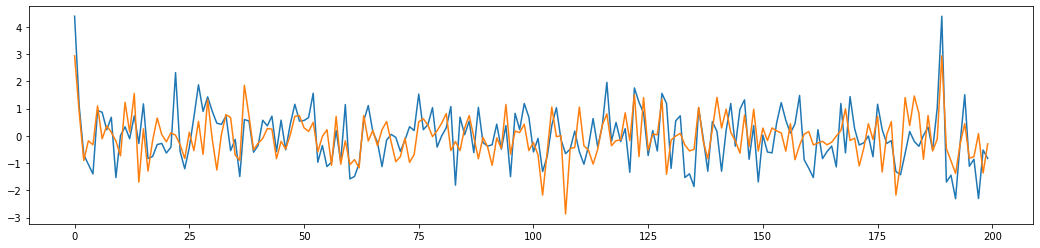

In [755]:
plt.figure(figsize=(18,4))
plt.plot(model.predict(testUIDs[:200]))
plt.plot(15*np.array([TRUTHTABLE[uid] for uid in testUIDs[:200]]))

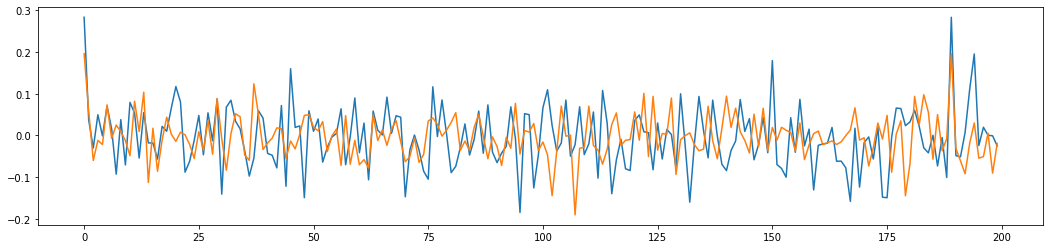

In [748]:
plt.figure(figsize=(18,4))
plt.plot(model2.predict(testUIDs[:200]))
plt.plot(np.array([TRUTHTABLE[uid] for uid in testUIDs[:200]]))